### 0. 安裝tensorflow跟keras

In [17]:
import sys
try:
    import keras
    v = keras.__version__
    v_list=v.split('.')
    print("你的 keras 版本為 "+v)
    if int(v[0])<2:
        !{sys.executable} -m pip install --upgrade keras 
except:
    !{sys.executable} -m pip install tensorflow==1.14.0 keras


你的 keras 版本為 2.3.0


### 1. 檢查keras版本

In [1]:
import keras
keras.__version__

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

'2.3.0'

### 2. 手寫數字辨識-載入 MNIST 資料集

In [22]:
from keras.datasets import mnist  

#載入訓練集跟測試集的影像及標籤
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


### 3. 檢視訓練集資料

In [4]:
#有 60000 張圖，每張大小是 28x28
train_images.shape 

(60000, 28, 28)

In [5]:
#標籤有 60000 個
len(train_labels)

60000

In [6]:
#標籤是 0-9 之間的數字, 資料類型為 uint8
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 4. 檢視測試集資料

In [7]:
#有 10000 張圖，每張大小是 28x28
test_images.shape 

(10000, 28, 28)

In [8]:
#標籤有 10000 個
len(test_labels)

10000

In [9]:
#標籤是 0-9 之間的數字, 資料類型為 uint8
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 5. 顯示資料集中的任一影像

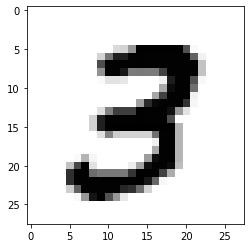

In [19]:
digit = train_images[7]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 6. 開始寫訓練程式-建立神經網路架構

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### 7. 編譯

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### 8. 預處理影像資料

In [23]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### 9. 準備標籤

In [14]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 10. 訓練神經網路模型

In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.2545 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.1043 - accuracy: 0.9692
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0686 - accuracy: 0.9796
Epoch 4/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0504 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0377 - accuracy: 0.9890


### 11. 用測試資料評估模型表現

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 45us/step
test_acc: 0.9793999791145325
